# Libraries and Data

In [1]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# import the predictions
df = pd.concat(map(pd.read_csv, ['../MetaProphet/predictions_prophet.csv',
                  '../Sarimax/predictions_sarimax.csv',
                  '../Silverkite/predictions_silverkite.csv',
                  '../LSTM/predictions_LSTM.csv']), axis=1).drop(columns=['Unnamed: 0', 'Date', 'ts'])
df.head()

,ds,prophet,SARIMAX,silverkite,LSTM
0,2021-01-01,724.952794,742.825725,749.870698,742.949272
1,2021-01-02,836.709759,854.952199,834.345095,869.389065
2,2021-01-03,754.990520,769.563344,751.784844,768.538369
3,2021-01-04,881.325562,907.509085,898.242799,906.973984
4,2021-01-05,751.228777,779.668983,778.078463,768.105942


In [8]:
# index
df.index = df.pop('ds')
df.head(1)

,prophet,SARIMAX,silverkite,LSTM
ds,,,,
2021-01-01,724.952794,742.825725,749.870698,742.949272


# Ensemble

In [25]:
# getting the error
error_prophet = float(pd.read_csv('../MetaProphet/best_params_prophet.csv').iloc[4, 1])
error_sarimax = pd.read_csv('../Sarimax/best_params_ARIMA.csv').iloc[6,1]
error_silverkite = float(pd.read_csv('../Silverkite/SilverkiteBestParams.csv').iloc[0,1])
error_lstm = pd.read_csv('../LSTM/Best Params LSTM.csv').iloc[7,1]

In [27]:
# average error
average_error = (error_prophet + error_sarimax + error_silverkite + error_lstm) / 4
print(f"The average error is {round(average_error, 2)}")

The average error is 63.0


In [30]:
# Initial weights
weight_prophet = 0.25 / (error_prophet / average_error)
print(f"The Prophet weight is {weight_prophet}")

weight_sarimax = 0.25 / (error_sarimax / average_error)
print(f"The Sarimax weight is {weight_sarimax}")

weight_silverkite = 0.25 / (error_silverkite / average_error)
print(f"The Silverkite weight is {weight_silverkite}")

weight_lstm = 0.25 / (error_lstm / average_error)
print(f"The LSTM weight is {weight_lstm}")



The Prophet weight is 0.327697725195793
The Sarimax weight is 0.2626817039093447
The Silverkite weight is 0.32948010908413883
The LSTM weight is 0.1637616975854552
Total weight sum is equal to 1.0836212357747317


In [32]:
# Extra weight
extra_weight = weight_prophet + weight_sarimax + weight_silverkite + weight_lstm
print(f"Total weight sum is equal to {extra_weight}")

Total weight sum is equal to 1.0836212357747317


# Ensemble Forecast

In [35]:
# Ensemble
df['ensemble'] = (df.prophet * weight_prophet + df.SARIMAX * weight_sarimax + df.silverkite * weight_silverkite + df.LSTM * weight_lstm) / extra_weight


<AxesSubplot:xlabel='ds'>

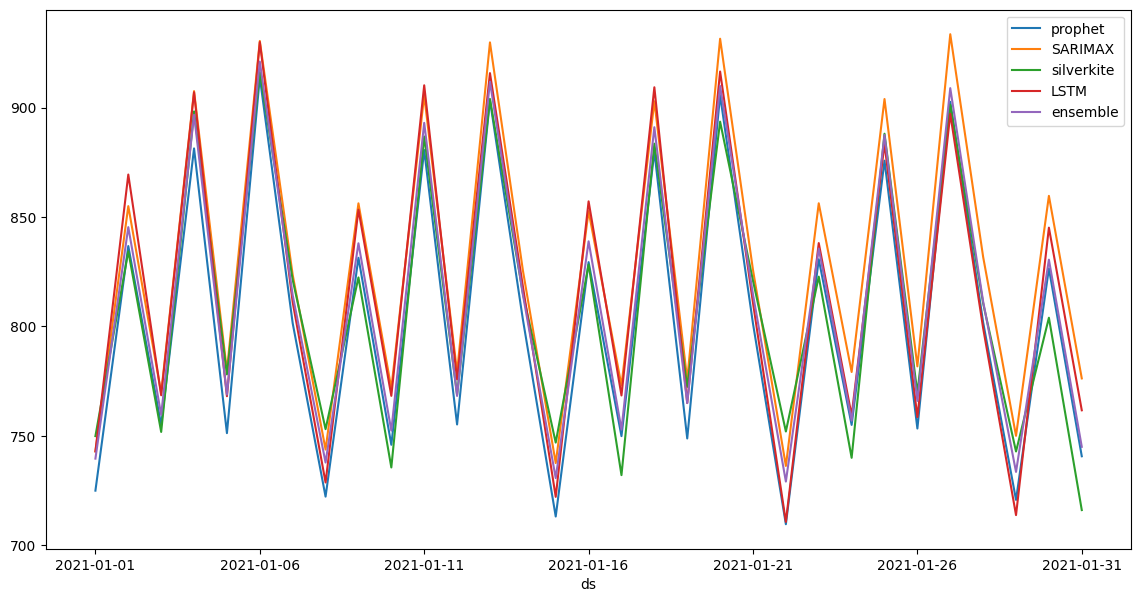

In [37]:
# Visualization
df.plot(figsize=(14,7), legend=True)